<a href="https://colab.research.google.com/github/Catia2021/Projeto8_MachineLearning_Crimes/blob/main/RegressaoLinearFinal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Previsão de Taxa de Crime


#Apresentação dos Dados

Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/sandorabad/georeferenced-forestfires-2017-chile )


#Problema de Negócio

Construir  um modelo de Machine Learning que  seja  capaz de fazer previsões sobre a  taxa de crime. 




#Objetivos do Projeto  

Instalar e importar bibliotecas apropriadas

Pré-processar os dados

Estabelecer as Variáveis Explanatória e a target



Escalonar os Atributos s/n

Dividir a base de dados em Treinamento e Teste

Criar e treinar  o algoritmo de Regressão Linear

Analisar  os resultados  utilizando o  R2 e  valor-p

#Importando Bibliotecas e Dados


In [ ]:
! pip install pyod

In [ ]:
!pip  install plotly --upgrade

In [110]:
import pandas as pd  # biblioteca para manipulação de dados   REVISAR REVISAR
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.model_selection import train_test_split  #para dividir base de teste e treinamento
import pickle
from sklearn.metrics import classification_report
from numpy.ma.core import filled
from IPython.core.pylabtools import figsize
from pyod. models.knn import KNN
from sklearn.linear_model import LinearRegression # para algoritmo de regressão linear
from sklearn.metrics import mean_absolute_error, mean_squared_error   
import statsmodels.api as sm

In [4]:
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


#Pré-Processamento dos Dados

In [5]:
Crime = pd.read_csv('/content/boston.csv' )

In [6]:
print( ' Este dataset tem %s linhas e %s colunas' % (Crime.shape[0] , Crime.shape[1] ) )
Crime.head()

 Este dataset tem 506 linhas e 14 colunas


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
Crime.tail()

Acima você pode conferir as primeiras e últimas linhas do dataset e o total de linhas e colunas. 
A seguir, as  correlações  entre as  variávies  serão visualizadas.

In [ ]:
Crime.corr()

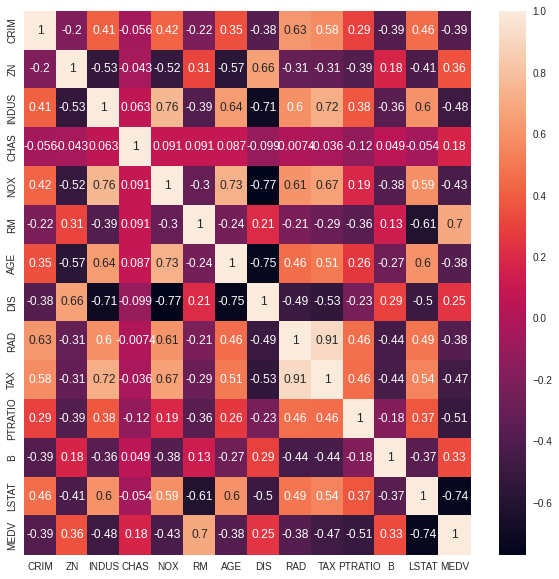

In [9]:
figura= plt.figure(figsize=(10,10))
sns.heatmap(Crime.corr(),annot=True);

**Diante  do  observado será feito uma regressão linear  múltipla e  as variáveis explanatórias  escolhidas serão  a relação  aluno/professor  por  cidade,  o percentual   de status  mais baixo da população,  taxa predial, índice de acesso a  highway e  concentração de óxidos nitrosos e a  variável de saída   será  a taxa de crime per capita.**


As  colunas abaixo, como não serão necessárias  para o projeto , usaremos  o comando drop  para  deletá-las. E em seguida,renomeadas para  melhor  compreensão. 

In [10]:
Crime.drop(['NOX', 'ZN', 'INDUS','CHAS','RM','AGE','DIS','B','MEDV'],axis=1, inplace=True )

**Verificando o dataset**

In [11]:
Crime.head(1)

,CRIM,RAD,TAX,PTRATIO,LSTAT
0,0.00632,1,296.0,15.3,4.98


In [12]:
Crime.columns = ['TaxaCrimePerCapita',' IndiceHighWay','TaxaPredial','RelacaoAlunoProfessorCidade','PercStatusBaixoPopulacao']

In [13]:
Crime.head(1)

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao
0,0.00632,1,296.0,15.3,4.98


**Vejamos um resumo do Dataset**

In [14]:
Crime.describe()    

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,9.549407,408.237154,18.455534,12.653063
std,8.601545,8.707259,168.537116,2.164946,7.141062
min,0.006320,1.000000,187.000000,12.600000,1.730000
25%,0.082045,4.000000,279.000000,17.400000,6.950000
50%,0.256510,5.000000,330.000000,19.050000,11.360000
75%,3.677082,24.000000,666.000000,20.200000,16.955000
max,88.976200,24.000000,711.000000,22.000000,37.970000


**Verificando, agora,  se há  valores missing**

In [15]:
Crime.isnull()

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
501,False,False,False,False,False
502,False,False,False,False,False
503,False,False,False,False,False
504,False,False,False,False,False


In [16]:
Crime.isnull().sum()

TaxaCrimePerCapita             0
 IndiceHighWay                 0
TaxaPredial                    0
RelacaoAlunoProfessorCidade    0
PercStatusBaixoPopulacao       0
dtype: int64

In [17]:
Crime.loc[Crime['PercStatusBaixoPopulacao']<=0]

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao


In [18]:
Crime.loc[Crime[' IndiceHighWay']<=0]

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao


In [19]:
Crime.loc[Crime['TaxaPredial']<=0]

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao


In [20]:
Crime.loc[Crime['RelacaoAlunoProfessorCidade']<=0]

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao


In [21]:
Crime.loc[Crime['TaxaCrimePerCapita']<=0]

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao


**Avaliando a correlação após  este processamento inicial**

In [22]:
Crime.corr()

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,RelacaoAlunoProfessorCidade,PercStatusBaixoPopulacao
TaxaCrimePerCapita,1.000000,0.625505,0.582764,0.289946,0.455621
IndiceHighWay,0.625505,1.000000,0.910228,0.464741,0.488676
TaxaPredial,0.582764,0.910228,1.000000,0.460853,0.543993
RelacaoAlunoProfessorCidade,0.289946,0.464741,0.460853,1.000000,0.374044
PercStatusBaixoPopulacao,0.455621,0.488676,0.543993,0.374044,1.000000


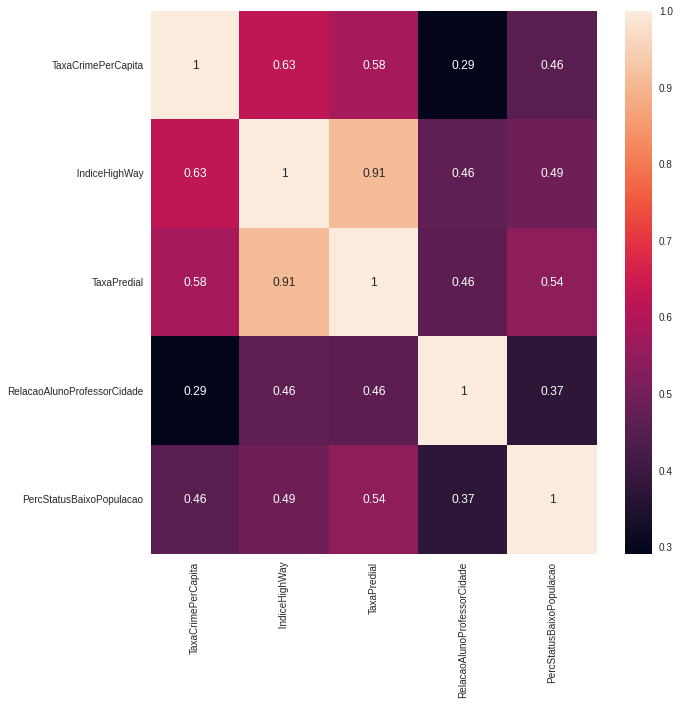

In [23]:
figura= plt.figure(figsize=(10,10))
sns.heatmap(Crime.corr(),annot=True);

**Apesar  das  correlações  observadas  serem positivas, se  observa  que  a correlação entre taxa de criminalidade  e relação professor  aluno é  muito baixa**.**Então  será  removida esta  variável explanatória relação professor/aluno. **

In [24]:
Crime.drop(['RelacaoAlunoProfessorCidade'],axis=1, inplace=True )

In [25]:
Crime.head(1)

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,PercStatusBaixoPopulacao
0,0.00632,1,296.0,4.98


**Agora  avaliando a colinearidade serão utilizados os conceitos de Eigenvalues e Eigenvector**

In [26]:
corr = np.corrcoef(Crime, rowvar = 0)
eigenvalues,eigenvectors = np.linalg.eig(corr)

In [27]:
print ( eigenvalues)

[2.82824457 0.08449595 0.48773824 0.59952123]


In [28]:
print(eigenvectors[:,1])

[-0.0750785   0.70636972 -0.69972448  0.07609657]


In [29]:
print (eigenvalues [1],eigenvalues[3])

0.08449595044794986 0.5995212349203068


In [ ]:
np.unique(Crime['TaxaCrimePerCapita'],return_counts=True)

**Não foram achadaos valores  missing e não há dados  desbalanceados na variável de saída.
Será  feita Visualização gráfica da  variável  numérica, que ajudam a identificar,também, existência de valores inconsistentes**  Há  multicolinearidade  entre as  variáveis indice de highway e taxa predial. A remoção de uma  destas variáveis  será feita  ao final,  para  que  se perceba a  diferença de resultados, pois  será feito comparação. 

In [31]:
plt.stackplot

<function matplotlib.pyplot.stackplot>

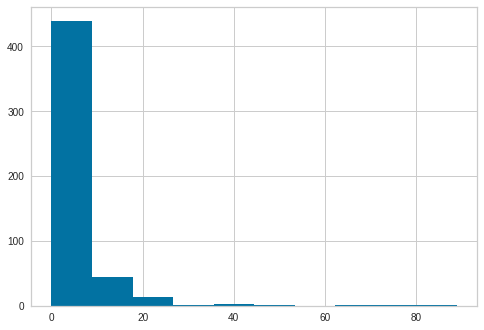

In [32]:
Crime["TaxaCrimePerCapita"].hist()

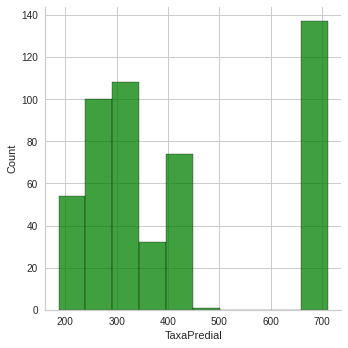

In [33]:
sns.displot(Crime['TaxaPredial'], color ='green')

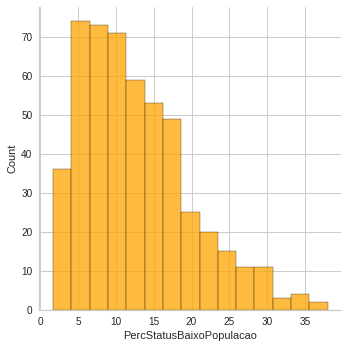

In [34]:
 sns.displot(Crime['PercStatusBaixoPopulacao'], color ='orange')

**Verificando se há Outliers.**

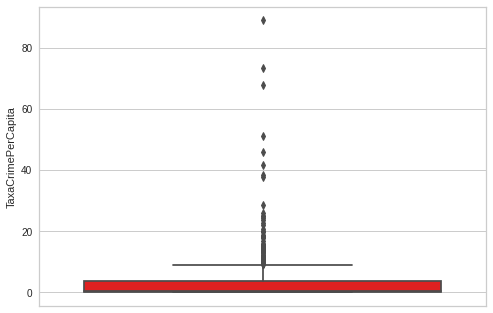

In [35]:
sns.boxplot(y= 'TaxaCrimePerCapita',data= Crime,color='red');

In [36]:
grafico= px.scatter(y=Crime['TaxaCrimePerCapita'], x=Crime['TaxaPredial'])
grafico.show()

In [37]:
grafico= px.scatter(y=Crime['TaxaCrimePerCapita'], x=Crime['PercStatusBaixoPopulacao'])
grafico.show()

In [38]:
grafico= px.scatter(y=Crime['TaxaCrimePerCapita'], x=Crime[' IndiceHighWay'])
grafico.show()

**Os  outliers  não serão tratados neste projeto**. **Será analisado o comportamento do  algoritmo, mesmo com estes outliers**.Mas faremos uma análise utilizando a biblioteca pyod.

In [39]:
detector = KNN()
detector.fit(Crime.iloc[:,[0]])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
previsores = detector.labels_
previsores

In [41]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([455,  51]))

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [43]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [44]:
print(outliers)

[367, 373, 374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 392, 394, 395, 398, 400, 403, 404, 405, 406, 407, 409, 410, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 424, 425, 426, 427, 434, 435, 437, 438, 440, 444, 445, 446, 468, 469, 477, 478]


**Foram detectados 51 outlieres. Os  índices dos outlieres  são os  verificados acima.**

**Após este processamento inicial será caracterizado os tipos de variáveis e seus significados.**

In [45]:
Crime.dtypes

TaxaCrimePerCapita          float64
 IndiceHighWay                int64
TaxaPredial                 float64
PercStatusBaixoPopulacao    float64
dtype: object

Se tem 4 variáveis  Numéricas, assim classificadas:

TaxaCrimePerCapita,TaxaPredial, PercStatusBaixoPopulacao : Numérica Contínua

IndiceHighWay : Numérica Discreta


**Dicionário de Dados** 

    
* TaxaCrimePerCapita: Taxa de  crime  por pessoa
* IndiceHighWay: Indice  que mede  a proximidade em realação a Highway
* TaxaPredial: Taxa de imposto predial

* PercStatusBaixoPopulacao:Percentual de população que pertence ao status de  baixa renda





#Preparando o banco de dados para análise dos algoritmos

#Dividindo as Variáveis Explanatórias e de Saída

In [46]:
Crime.head(1)

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,PercStatusBaixoPopulacao
0,0.00632,1,296.0,4.98


In [47]:
X_Crime = Crime.iloc[:,1:4].values
Y_Crime = Crime.iloc[:,0].values

In [ ]:
X_Crime

In [ ]:
Y_Crime

#Escalonando os Atributos

In [83]:
scaler_Crime = StandardScaler()
X_under = scaler_Crime.fit_transform(X_Crime)

In [ ]:
X_under

**Feito a Padronização, se procede à divisão das bases de dados em Treinamento e Teste.**

#Divisão Base de Treinamento e Teste


**Serão criados 4 variáveis , duas para treinamento e 2 para teste.**


In [87]:
X_under_treinamento, X_under_teste,Y_treinamento,Y_teste = train_test_split(X_Crime,Y_Crime, test_size=0.25,random_state=0)

**Verificando as variáveis criadas.**


In [88]:
X_under_treinamento.shape

(379, 3)

In [89]:
X_under_teste.shape

(127, 3)

In [90]:
Y_treinamento.shape

(379,)

In [91]:
Y_teste.shape

(127,)

In [92]:
X_under_teste.shape,Y_teste.shape

((127, 3), (127,))

# Criando e  Treinando o Algoritmo Regressão Linear

**Criando  via Stats Models**

In [94]:
X_under_treinamento = sm.add_constant(X_under_treinamento)
modelo = sm.OLS(Y_treinamento, X_under_treinamento)
modelo2 = modelo.fit()

In [95]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     90.76
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           3.57e-44
Time:                        13:34:04   Log-Likelihood:                -1234.0
No. Observations:                 379   AIC:                             2476.
Df Residuals:                     375   BIC:                             2492.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6050      1.149     -3.137      0.0

In [96]:
print(modelo2.params)

[-3.60497303  0.55169465 -0.00362356  0.2619495 ]


Os  coeficientes(pesos )que  compuseram a equação estão demonstrados acima.  Baseado no R2 percebe-se  que 42% da variabilidade da  taxa de crime per capita é  explicada pelas  variáveis  explanatórias.O que não indica  uma boa informação. Seria necessário incluir mais  variávies explanatórias para tentar melhorar o R2.E  pelos valores p observados, se nota  que as  três variávies se relacionam  com a variável taxa de crime per capita, ou seja, são variávies  significativas.


In [ ]:
previsoes = modelo2.predict(X_treinamento)
previsoes

#Conclusão

O modelo criado precisa  ser reavaliado, acrescentando mais  variáveis  explanatórias para  reduzir o R2, embora se percebe  que  há relação significativa entre as variáveis explanatórias e a de saída.

# Criando Modelo  após  retirar  uma das   variáveis  com Multicolinearidade

 




In [112]:
Crime.head(1)

,TaxaCrimePerCapita,IndiceHighWay,TaxaPredial,PercStatusBaixoPopulacao
0,0.00632,1,296.0,4.98


In [113]:
X_Crime = Crime.iloc[:,2:4].values
Y_Crime = Crime.iloc[:,0].values

In [ ]:
X_Crime

In [ ]:
Y_Crime

In [116]:
scaler_Crime = StandardScaler()
X_under = scaler_Crime.fit_transform(X_Crime)

In [117]:
X_under_treinamento, X_under_teste,Y_treinamento,Y_teste = train_test_split(X_Crime,Y_Crime, test_size=0.25,random_state=0)

In [118]:
X_under_treinamento = sm.add_constant(X_under_treinamento)
modelo = sm.OLS(Y_treinamento, X_under_treinamento)
modelo2 = modelo.fit()

In [119]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.73e-37
Time:                        14:44:31   Log-Likelihood:                -1253.3
No. Observations:                 379   AIC:                             2513.
Df Residuals:                     376   BIC:                             2524.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5165      0.893     -9.541      0.0

#Conclusão 2
Em relação a  outra análise , o R2 piorou, mas o valor-p  continua mostrando relação entre as  variávies explanatórias e  target.Em outro Projeto outros indices serão avaliados  assim como introduzidas outras  variáveis de análise  para  ajustes  do modelo.E será  usado  o modelo sckit learn. 